__<font size="5"><strong>New York Housing</strong> </font>__
**Author:** *Ibrahim Munirudeen oshone*
<a id="Introduction"></a>

<img src="https://inhabit.corcoran.com/wp-content/uploads/2024/10/sm_q3-2024.jpg" height="200px"> <center><h1>🏠 NYC House Price Prediction 🏠</h1></center>
Introduction

Ever wondered how much a house in New York really costs? 🤔

House prices fluctuate due to location, number of bedrooms, proximity to schools, transportation, and even neighborhood trends. But with the right data, we can estimate these prices accurately.

🟢 Goal: This analysis aims to predict house prices in New York, helping buyers, sellers, and real estate professionals make informed decisions. We will explore how different features impact price and identify key trends in the NYC housing market.

By analyzing data from New York neighborhoods, we aim to uncover patterns in real estate pricing.

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [3]:
df = pd.read_csv("NY-House-Dataset.csv")
df.tail()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.0,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.0,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.0,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.0,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752
4800,Brokered by Nyc Realty Brokers Llc,Co-op for sale,349000,1,1.0,750.000000,460 Neptune Ave Apt 14O,"Brooklyn, NY 11224","460 Neptune Ave Apt 14OBrooklyn, NY 11224",New York,Kings County,Brooklyn,Coney Island,460,"460 Neptune Ave #14a, Brooklyn, NY 11224, USA",40.579147,-73.970949


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

**from the info above, we find out that the dataset contains 17 columns with no null values**

# Data Preprocessing <a class="anchor" id="preprocessing"></a>

## Data preparation <a class="anchor" id="preparation"></a>


* __I transformed the property type column to only show the type name by removing the "for sale"__

* __I dropped columns that are irrelevant to our analysis__


In [9]:
df.head(5)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [10]:
df.columns = df.columns.str.lower()


In [11]:
#clean the type column to only contaion the house type by removing the for sale
df["type"] = df["type"].str.split(" ", expand=True)[0]

In [12]:
df.head()

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


**I dropped colums that are irrelevant our analysis reducing the numbers of columns to 9**

In [14]:
df.drop(columns=["brokertitle","main_address", "street_name", "formatted_address", "long_name", "administrative_area_level_2", "state", "address"], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          4801 non-null   object 
 1   price         4801 non-null   int64  
 2   beds          4801 non-null   int64  
 3   bath          4801 non-null   float64
 4   propertysqft  4801 non-null   float64
 5   locality      4801 non-null   object 
 6   sublocality   4801 non-null   object 
 7   latitude      4801 non-null   float64
 8   longitude     4801 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 337.7+ KB


In [16]:
#converted bath from float data type to int to remove the decimal point
df["bath"] = df["bath"].astype(int)

## Data Cleaning <a class="anchor" id="data cleaning"></a>
* __Checked for duplicate rows and removed 215 duplicate rows found in the datase__
* __Checked for outliers__

In [18]:
#checking for null values
print(df.isnull().sum())

type            0
price           0
beds            0
bath            0
propertysqft    0
locality        0
sublocality     0
latitude        0
longitude       0
dtype: int64


In [19]:
#checking for duplicate rows
duplicates = df.duplicated()
len(df[duplicates])


215

In [20]:
#removing duplicate data from my dataset
df = df.drop_duplicates()
df.shape

(4586, 9)

In [21]:
housing_with_7 = df["beds"] <= 7
housing_9_baths = df["bath"] <= 9

df[housing_with_7 & housing_9_baths]
df.shape

(4586, 9)

In [22]:
df = df[housing_with_7 & housing_9_baths]
df.shape

(4364, 9)

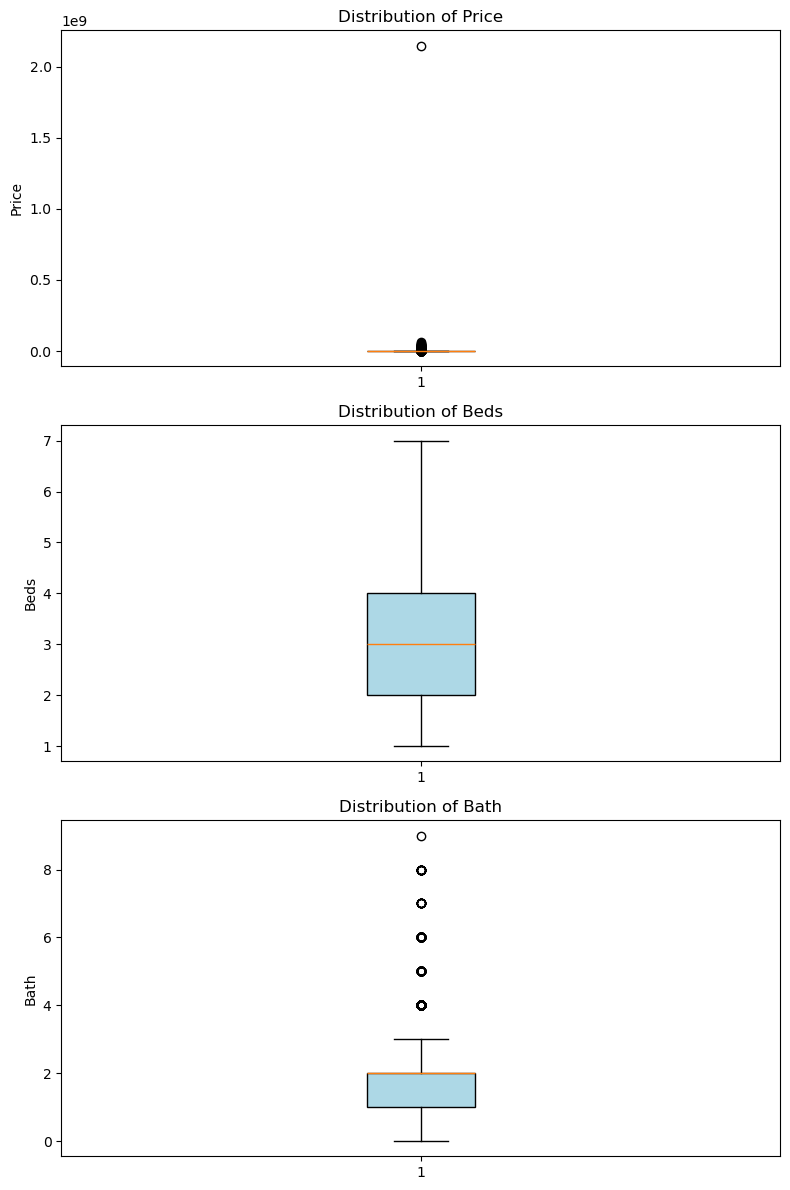

In [23]:
#checking for outliers by price, bed and bath column using boxplot

columns = ["price", "beds", "bath"]

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 12))

for i, col in enumerate(columns):
    axes[i].boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(f"Distribution of {col.capitalize()}")
    axes[i].set_ylabel(col.capitalize())

plt.tight_layout()
plt.show()

In [24]:
df["type"].unique()

array(['Condo', 'House', 'Townhouse', 'Co-op', 'Multi-family', 'For',
       'Contingent', 'Land', 'Foreclosure', 'Pending', 'Coming', 'Mobile',
       'Condop'], dtype=object)

In [25]:
valid_house_types = [
    'Condo', 'House', 'Townhouse', 'Co-op', 
    'Multi-family', 'Mobile', 'Condop'
]

invalid_counts = df.loc[~df["type"].isin(valid_house_types), "type"].value_counts()
print(invalid_counts)


type
Pending        224
Contingent      84
Land            47
For             19
Foreclosure     14
Coming           2
Name: count, dtype: int64


In [26]:
df = df[df["type"].isin(valid_house_types)]


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3974 entries, 0 to 4800
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          3974 non-null   object 
 1   price         3974 non-null   int64  
 2   beds          3974 non-null   int64  
 3   bath          3974 non-null   int32  
 4   propertysqft  3974 non-null   float64
 5   locality      3974 non-null   object 
 6   sublocality   3974 non-null   object 
 7   latitude      3974 non-null   float64
 8   longitude     3974 non-null   float64
dtypes: float64(3), int32(1), int64(2), object(3)
memory usage: 294.9+ KB


In [28]:
df["sublocality"].unique()

array(['Manhattan', 'Richmond County', 'New York County', 'Kings County',
       'New York', 'East Bronx', 'Brooklyn', 'The Bronx', 'Queens',
       'Staten Island', 'Queens County', 'Bronx County', 'Coney Island',
       'Brooklyn Heights', 'Jackson Heights', 'Riverdale', 'Rego Park',
       'Fort Hamilton', 'Flushing', 'Dumbo', 'Snyder Avenue'],
      dtype=object)

In [29]:
# Mapping locality → borough
# ---------------------------------------------
# Counties and alternate names are mapped to their official boroughs.
# Anything not in this mapping will become NaN and later removed.

borough_mapping = {
    # Manhattan
    "New York": "Manhattan",
    "New York County": "Manhattan",
    "Manhattan": "Manhattan",

    # Brooklyn
    "Brooklyn": "Brooklyn",
    "Kings County": "Brooklyn",

    # Bronx
    "The Bronx": "Bronx",
    "Bronx County": "Bronx",

    # Queens
    "Queens": "Queens",
    "Queens County": "Queens",

    # Staten Island
    "Staten Island": "Staten Island",
    "Richmond County": "Staten Island"
}


In [30]:
# Mapping sublocality → neighborhood
# ---------------------------------------------
# Neighborhoods remain as neighborhoods.
# Borough/County names map to borough names (as fallback).
# Invalid or non-neighborhood values are set to None.


neighborhood_mapping = {
    # Manhattan
    "New York": "Manhattan",
    "New York County": "Manhattan",
    "Manhattan": "Manhattan",

    # Brooklyn neighborhoods
    "Brooklyn": "Brooklyn",
    "Kings County": "Brooklyn",
    "Dumbo": "Dumbo",
    "Coney Island": "Coney Island",
    "Brooklyn Heights": "Brooklyn Heights",
    "Fort Hamilton": "Fort Hamilton",
    "Snyder Avenue": None,  # INVALID

    # Bronx neighborhoods
    "The Bronx": "Bronx",
    "Bronx County": "Bronx",
    "East Bronx": "East Bronx",
    "Riverdale": "Riverdale",

    # Queens neighborhoods
    "Queens": "Queens",
    "Queens County": "Queens",
    "Jackson Heights": "Jackson Heights",
    "Rego Park": "Rego Park",
    "Flushing": "Flushing",

    # Staten Island
    "Staten Island": "Staten Island",
    "Richmond County": "Staten Island"
}


In [31]:
# Apply mappings to DataFrame

df["borough"] = df["locality"].map(borough_mapping)
df["neighborhood"] = df["sublocality"].map(neighborhood_mapping)


In [32]:
# Remove invalid rows
df = df.dropna(subset=["borough", "neighborhood"])


In [33]:
#Remove the locality and sublocality column
df.drop(columns=["locality", "sublocality"], inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3942 entries, 0 to 4800
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          3942 non-null   object 
 1   price         3942 non-null   int64  
 2   beds          3942 non-null   int64  
 3   bath          3942 non-null   int32  
 4   propertysqft  3942 non-null   float64
 5   latitude      3942 non-null   float64
 6   longitude     3942 non-null   float64
 7   borough       3942 non-null   object 
 8   neighborhood  3942 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(3)
memory usage: 292.6+ KB


In [35]:
#create a for price_per_sqft
df["price_per_sqft"] = round(df["price"] / df["propertysqft"], 2)
df.head()

,type,price,beds,bath,propertysqft,latitude,longitude,borough,neighborhood,price_per_sqft
0,Condo,315000,2,2,1400.0,40.761255,-73.974483,Manhattan,Manhattan,225.00
2,House,260000,4,2,2015.0,40.541805,-74.196109,Manhattan,Staten Island,129.03
3,Condo,69000,3,1,445.0,40.761398,-73.974613,Manhattan,Manhattan,155.06
4,Townhouse,55000000,7,2,14175.0,40.767224,-73.969856,Manhattan,Manhattan,3880.07
5,House,690000,5,2,4004.0,40.674363,-73.958725,Manhattan,Brooklyn,172.33


# Exploratory Data Analysis <a class="anchor" id="eda"></a>

## By Type (house Type) <a class="anchor" id="type"></a>

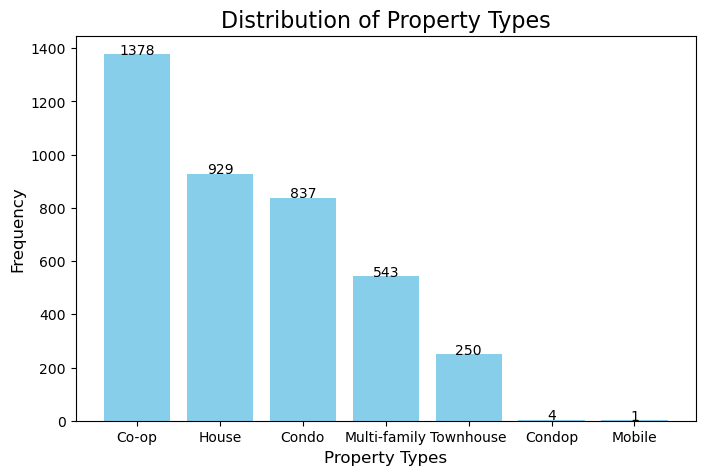

In [38]:
typeCount = df["type"].value_counts()
fig, ax = plt.subplots(figsize=(8, 5))

# Create a bar plot
ax.bar(typeCount.index, typeCount.values, color='skyblue')

# Set title and labels
ax.set_title('Distribution of Property Types', fontsize=16)
ax.set_xlabel('Property Types', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Add value labels on top of bars
for i, v in enumerate(typeCount.values):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)

# Show plot
plt.show()

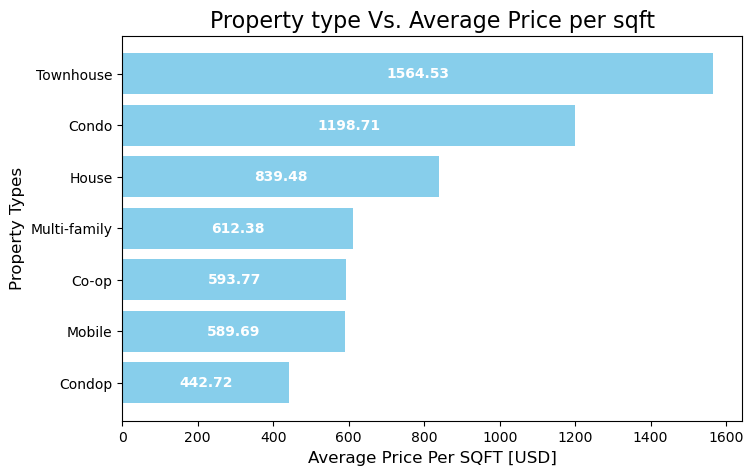

In [39]:
mean_price_per_sqft = round(df.groupby("type")["price_per_sqft"].mean().sort_values(), 2)
fig, ax = plt.subplots(figsize=(8, 5))

# Create a bar plot
ax.barh(mean_price_per_sqft.index, mean_price_per_sqft.values, color='skyblue')

# Set title and labels
ax.set_title('Property type Vs. Average Price per sqft', fontsize=16)
ax.set_xlabel('Average Price Per SQFT [USD]', fontsize=12)
ax.set_ylabel('Property Types', fontsize=12)

# Add values inside bars
for i, v in enumerate(mean_price_per_sqft.values):
    ax.text(v/2, i, str(v), va='center', ha='center', color='white', fontsize=10, fontweight='bold')


# Show plot
plt.show()

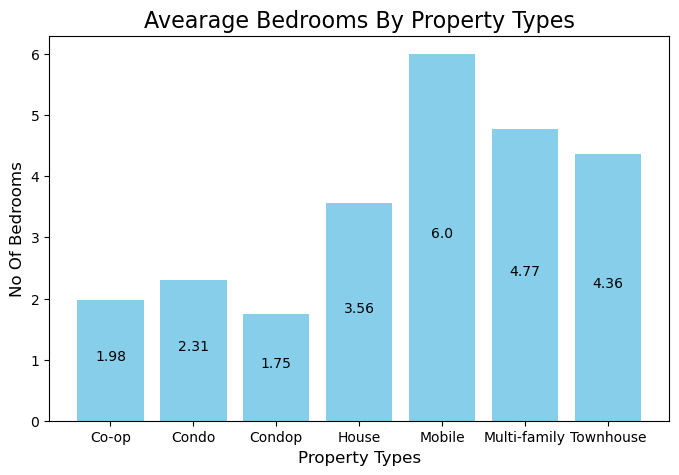

In [40]:
bedCountByType = round(df.groupby("type")["beds"].mean(), 2)
fig, ax = plt.subplots(figsize=(8, 5))

# Create a bar plot
ax.bar(bedCountByType.index, bedCountByType.values, color='skyblue')

# Set title and labels
ax.set_title('Avearage Bedrooms By Property Types', fontsize=16)
ax.set_xlabel('Property Types', fontsize=12)
ax.set_ylabel('No Of Bedrooms', fontsize=12)

# Add value labels on top of bars
for i, v in enumerate(bedCountByType.values):
    ax.text(i, v/2, str(v), ha='center', fontsize=10)

# Show plot
plt.show()

In [83]:
Types_in_locality = df.groupby(["borough", "type"]).size().reset_index(name="count")
Types_in_locality

,borough,type,count
0,Bronx,Co-op,137
1,Bronx,Condo,30
2,Bronx,House,2
3,Bronx,Townhouse,1
4,Brooklyn,Co-op,210
5,Brooklyn,Condo,186
6,Brooklyn,House,4
7,Brooklyn,Multi-family,2
8,Brooklyn,Townhouse,4
9,Manhattan,Co-op,640


In [85]:
borough_df = df[df['borough'] == "Manhattan"]

# count property types
distribution = borough_df['type'].value_counts().reset_index()
distribution

,type,count
0,House,922
1,Co-op,640
2,Multi-family,540
3,Condo,452
4,Townhouse,244
5,Condop,4
6,Mobile,1


In [89]:
distribution['percentage'] = round((distribution['count'] / distribution['count'].sum()) * 100,2)
print(distribution)


           type  count  percentage
0         House    922       32.89
1         Co-op    640       22.83
2  Multi-family    540       19.27
3         Condo    452       16.13
4     Townhouse    244        8.70
5        Condop      4        0.14
6        Mobile      1        0.04


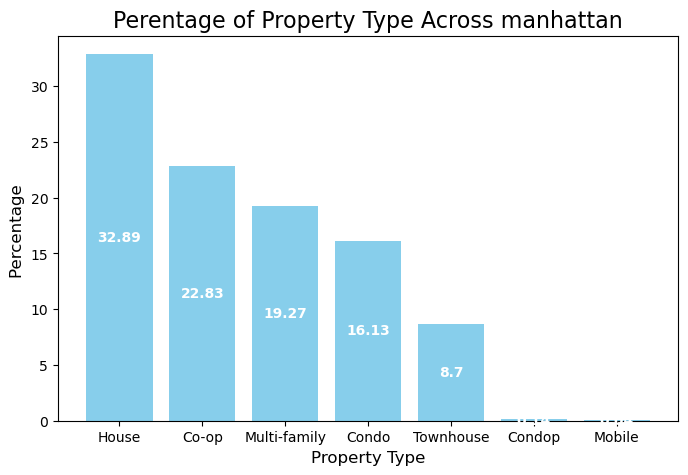

In [105]:

fig, ax = plt.subplots(figsize=(8, 5))

# Create a bar plot
ax.bar(distribution.type, distribution.percentage, color='skyblue')

# Set title and labels
ax.set_title('Perentage of Property Type Across manhattan', fontsize=16)
ax.set_xlabel('Property Type', fontsize=12)
ax.set_ylabel('Percentage ', fontsize=12)

# Add values inside bars
for i, v in enumerate(distribution.percentage):
    ax.text( i, v/2,str(v), va='center', ha='center', color='white', fontsize=10, fontweight='bold')


# Show plot
plt.show()

## By Size (house Size using square ft) <a class="anchor" id="size"></a>

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3942 entries, 0 to 4800
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            3942 non-null   object 
 1   price           3942 non-null   int64  
 2   beds            3942 non-null   int64  
 3   bath            3942 non-null   int32  
 4   propertysqft    3942 non-null   float64
 5   latitude        3942 non-null   float64
 6   longitude       3942 non-null   float64
 7   borough         3942 non-null   object 
 8   neighborhood    3942 non-null   object 
 9   price_per_sqft  3942 non-null   float64
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 323.4+ KB


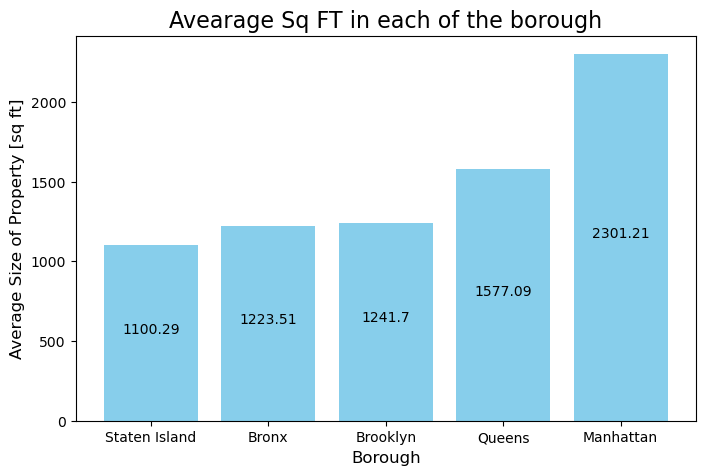

In [155]:
mean_sqft_locality = round(df.groupby("borough")["propertysqft"].mean().sort_values(), 2)
mean_sqft_locality

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(mean_sqft_locality.index, mean_sqft_locality.values, color='skyblue')

# Set title and labels
ax.set_title('Avearage Sq FT in each of the borough', fontsize=16)
ax.set_xlabel('Borough', fontsize=12)
ax.set_ylabel('Average Size of Property [sq ft]', fontsize=12)

# Add value labels on top of bars
for i, v in enumerate(mean_sqft_locality.values):
    ax.text(i, v/2, str(v), ha='center', fontsize=10)

# Show plot
plt.show()


## By Location (Longitude and Latitude) <a class="anchor" id="location"></a>

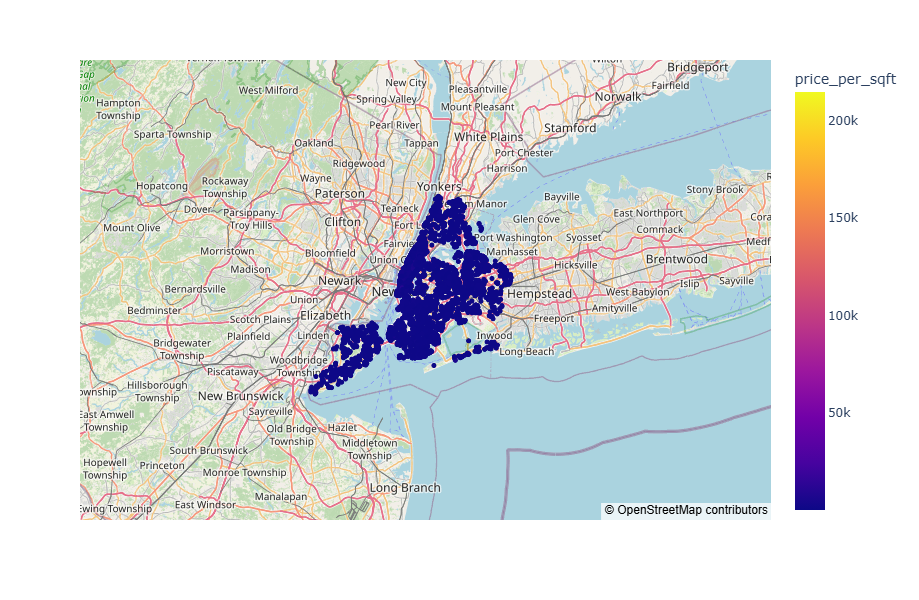

In [179]:
fig = px.scatter_mapbox(
    df,
    lat = "latitude",
    lon = "longitude",
    width = 600,
    height = 600,
    color = "price_per_sqft",
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

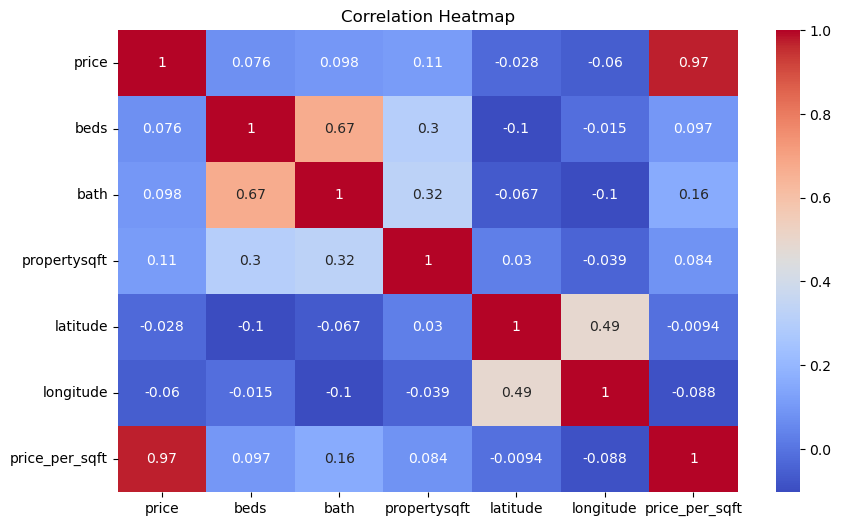

In [190]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

plt.show()


In [192]:
df.to_csv("processed_house_data.csv", index=False)
